In [6]:
import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
from matplotlib import pyplot as plt

init_printing()


def euro_vanilla_call(S, K, T, r, sigma):
    # S: spot price
    # K: strike price
    # T: time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    return call





def euro_vanilla_put(S, K, T, r, sigma):
    # S: spot price
    # K: strike price
    # T: time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    return put


In [7]:

print ("call", euro_vanilla_call(150, 100, 1, 0.05, 0.25))


print ("put", euro_vanilla_put(50, 100, 1, 0.05, 0.25))


call 55.27805761040315
put 45.15029495944084


In [8]:
# Varying T 1 to 50 time periods. 
time_list = []
call_options = []

for t_ in range(1,50):
    # print ("t_", t_)
    time_list.append(t_)
    call_options.append(euro_vanilla_call(150, 100, t_, 0.05, 0.25))
    # print ("call", euro_vanilla_call(150, 100, t_, 0.05, 0.25))
    


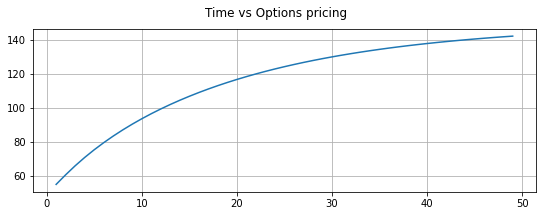

In [10]:


plt.figure(figsize=(9, 3))
plt.grid(True)
# plt.subplot(131)
# plt.bar(names, values)
# plt.subplot(132)
# plt.scatter(time_list, values)
# plt.subplot(133)
plt.plot(time_list, call_options)
plt.suptitle('Time vs Options pricing')
plt.show()

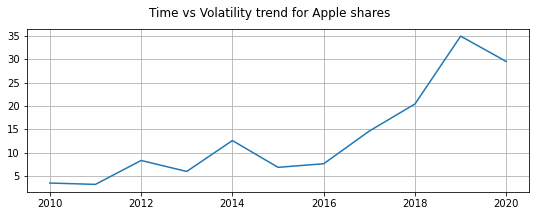

In [14]:
# Apples volatility shares 

time_years  = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
volatility_values = [3.49, 3.20, 8.32, 5.97, 12.59, 6.85,7.62, 14.63, 20.43, 34.95, 29.51]

plt.figure(figsize=(9, 3))

# plt.subplot(131)
# plt.bar(names, values)
# plt.subplot(132)
# plt.scatter(time_list, values)
# plt.subplot(133)
plt.grid(True)
plt.plot(time_years, volatility_values)
plt.suptitle('Time vs Volatility trend for Apple shares')
plt.show()

# Rise in volatility should give rise to more call option pricing 

In [15]:
# Weekly volatility 
path = "/Users/shreyajain/Desktop/FinTech/apple_volatility.csv"
fopen = open(path,"r")

time_list = []
volatility_options = []

for e_ in fopen: 
    time_list.append(float(str(e_).split("\t")[0]))
    volatility_options.append(float(str(e_).split("\t")[1].strip("\n")))

print("time_list ", time_list)
print("volatility_options ", volatility_options)

time_list  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]
volatility_options  [4.9, 2.69, 0.96, 6.64, 5.54, 2.7, 3.81, 10.06, 5.38, 12.73, 7.77, 11.08, 6.09, 3.29, 5.03, 4.65, 5.19, 5.98, 2.75, 2.32, 0.6, 3.52, 6.88, 3.42]


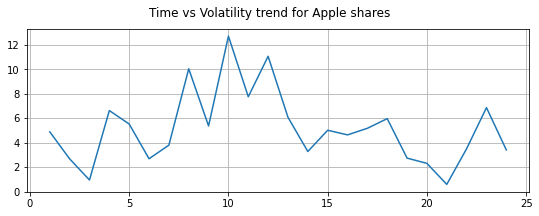

In [16]:
plt.figure(figsize=(9, 3))

# plt.subplot(131)
# plt.bar(names, values)
# plt.subplot(132)
# plt.scatter(time_list, values)
# plt.subplot(133)
plt.grid(True)
plt.plot(time_list, volatility_options)
plt.suptitle('Time vs Volatility trend for Apple shares')
plt.show()

# Rise in volatility should give rise to more call option pricing 

In [17]:
# Varying T 1 to 24 time periods. in weeks

call_options = []

for t_, sigma_ in zip(time_list, volatility_options):
    # print ("t_", t_)
    # time_list.append(t_)
    call_options.append(euro_vanilla_call(150, 130, t_/52.0, 0.05, sigma_))
    # print ("call", euro_vanilla_call(150, 100, t_, 0.05, 0.25))

print("time_list ", time_list)
print ("call_options ", call_options)

time_list  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]
call_options  [48.08000057588741, 40.29081987412299, 25.493000799619523, 100.30093048955777, 95.71409757929742, 60.32908262477424, 82.71814480489911, 143.25648045898978, 113.4667377150212, 149.27052397306173, 139.7328298562503, 148.91975342303542, 132.26860743121094, 95.54809281475404, 125.51896359542337, 122.71010761776057, 130.92144514513427, 139.13359788869693, 93.9589588588656, 84.90900021482592, 34.13680546204775, 115.18995488707387, 146.94272353205295, 116.18139694857516]


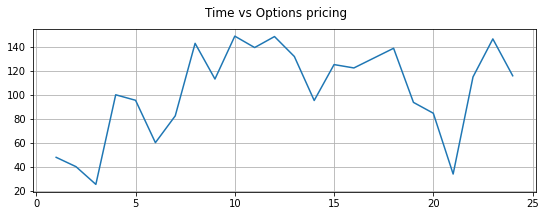

In [18]:
plt.figure(figsize=(9, 3))

plt.clf()
# plt.subplot(131)
# plt.bar(names, values)
# plt.subplot(132)
# plt.scatter(time_list, values)
# plt.subplot(133)
plt.grid(True)
plt.plot(time_list, call_options)
plt.suptitle('Time vs Options pricing')
plt.show()

# rise in options pricing due to high volatility 

In [21]:
# Varying T 1 to 24 time periods. in weeks
import random
call_options = []
volatility_options_new = []

for t_, sigma_ in zip(time_list, volatility_options):
    # print ("t_", t_)
    # time_list.append(t_)
    
    r = random.uniform(0, 1)
    volatility_options_new.append(r)
    call_options.append(euro_vanilla_call(150, 130, t_/52.0, 0.05, r))
    # print ("call", euro_vanilla_call(150, 100, t_, 0.05, 0.25))

print("time_list ", time_list)
print ("call_options ", call_options)

# Low volatility 

time_list  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]
call_options  [20.124939923103113, 21.41568799953673, 23.81124650593854, 24.070841962891635, 25.67927693701415, 22.17946838639513, 28.025078186636648, 21.4666508080077, 24.781646597564276, 26.384429458774946, 37.25807429677717, 26.593372510807697, 21.6148859357954, 23.097813222832258, 21.861543139514538, 40.703375581102904, 29.957487735520843, 29.00906167256275, 34.78709258016953, 22.47611760682632, 33.008431274627014, 36.98639892942968, 23.12855667678207, 23.685871155615445]


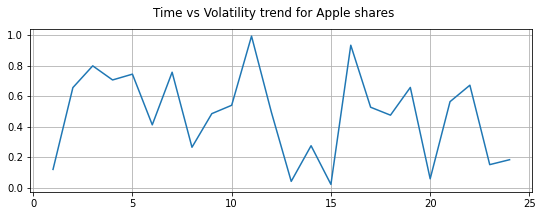

In [22]:
plt.figure(figsize=(9, 3))

# plt.subplot(131)
# plt.bar(names, values)
# plt.subplot(132)
# plt.scatter(time_list, values)
# plt.subplot(133)
plt.grid(True)
plt.plot(time_list, volatility_options_new)
plt.suptitle('Time vs Volatility trend for Apple shares')
plt.show()


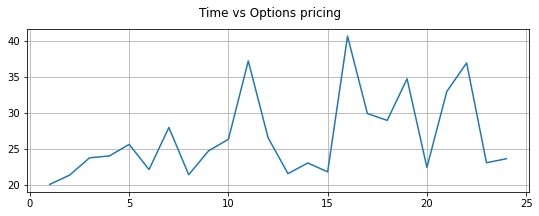

In [24]:
plt.figure(figsize=(9, 3))

plt.clf()
# plt.subplot(131)
# plt.bar(names, values)
# plt.subplot(132)
# plt.scatter(time_list, values)
# plt.subplot(133)
plt.grid(True)
plt.plot(time_list, call_options)
plt.suptitle('Time vs Options pricing')
plt.show()

# low options pricing due to low volatility 